In [1]:
import numpy as np

In [2]:
import random

In [3]:
def initGame ():
    dealer_sum=random.randint(1,10)
    player_sum=random.randint(1,10)
    state=(dealer_sum,player_sum,0)
    return state

In [4]:
initGame()

(6, 4, 0)

In [31]:
def makeMove(state,action):
    dealer_sum,player_sum,done=state
    
   
    if(action==1):
         if(player_sum>0 and player_sum<=21):
            done=0
            new_card=random.randint(1,10)
            if(random.random()>0.66):
                player_sum=player_sum-new_card
                if(player_sum<1):
                    done=4
            else :
                player_sum=player_sum+new_card
                if(player_sum>21):
                    done=4
         else :
            done=4

    if action==0:

        while(dealer_sum<17):
            if dealer_sum<1 :
                done=2
                break
            new_card=random.randint(1,10)
            if(random.random()>0.66):
                dealer_sum=dealer_sum-new_card
            else :
                dealer_sum=dealer_sum+new_card
        if(dealer_sum>21):
            
            done=2
        elif dealer_sum>player_sum :
            done=4
    
        elif(player_sum>dealer_sum):
            
            done=2
        elif(player_sum==dealer_sum):
            done=3
   
    state=(dealer_sum,player_sum,done)
    
    return state

In [19]:
def get_reward(state):
    dealer_sum,player_sum,done=state
    return 3-done
        
    
        
    

In [20]:
start=initGame()
print(start)

(10, 3, 0)


In [21]:
print(get_reward(start))

3


In [22]:
def createStates():
    states=[]
    for i in range(1,11):
        for j in range(1,22):
            states.append((i,j))
            
    return states
            

In [23]:
def createTable(states):
    av={}
    for i in states:
        av[(i,0)]=0
        av[(i,1)]=0
    return av

In [24]:
def initSAcount(stateActions):
    counts = {}
    for sa in stateActions:
        counts[sa] = 0
    return counts

In [25]:
def initSA(states):
    counts = {}
    for sa in states:
        counts[sa] = 0
    return counts

In [26]:
def updateQtable(av_table, av_count, returns):
    for key in returns:
        av_table[key] = av_table[key] + (1.0 / av_count[key]) * (returns[key]- av_table[key])
    return av_table
    

In [27]:
def qsv(state, av_table):
    stay = av_table[(state,0)]
    hit = av_table[(state,1)]
    return np.array([stay, hit])

In [48]:


epochs=10000
stateSpace=createStates()
av=createTable(stateSpace)
av_c=initSAcount(av)
s_c=initSA(stateSpace)
for i in range(epochs):


    state=initGame()
    dealer,player,done=state
    state1=(dealer,player)
    returns={}
    while(state[2]==0):
        dealer,player,done=state
        state1=(dealer,player)
        s_c[state1]+=1
        
        if random.random()>100/(100+s_c[state1]):
            a=np.argmax(qsv(state1,av))

        else :
            a=random.randint(0,1)
            
        q_t=((state1,a))
        state=makeMove(state,a)
        
        
        av_c[q_t]+=1
        
        returns[q_t]=0

    for key in returns:
   
        returns[key]=get_reward(state)
        
    av_table = updateQtable(av, av_c, returns)


In [311]:
len(stateSpace)

210

In [292]:
stateSpace

[(1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (1, 10),
 (1, 11),
 (1, 12),
 (1, 13),
 (1, 14),
 (1, 15),
 (1, 16),
 (1, 17),
 (1, 18),
 (1, 19),
 (1, 20),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (2, 10),
 (2, 11),
 (2, 12),
 (2, 13),
 (2, 14),
 (2, 15),
 (2, 16),
 (2, 17),
 (2, 18),
 (2, 19),
 (2, 20),
 (3, 1),
 (3, 2),
 (3, 3),
 (3, 4),
 (3, 5),
 (3, 6),
 (3, 7),
 (3, 8),
 (3, 9),
 (3, 10),
 (3, 11),
 (3, 12),
 (3, 13),
 (3, 14),
 (3, 15),
 (3, 16),
 (3, 17),
 (3, 18),
 (3, 19),
 (3, 20),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 4),
 (4, 5),
 (4, 6),
 (4, 7),
 (4, 8),
 (4, 9),
 (4, 10),
 (4, 11),
 (4, 12),
 (4, 13),
 (4, 14),
 (4, 15),
 (4, 16),
 (4, 17),
 (4, 18),
 (4, 19),
 (4, 20),
 (5, 1),
 (5, 2),
 (5, 3),
 (5, 4),
 (5, 5),
 (5, 6),
 (5, 7),
 (5, 8),
 (5, 9),
 (5, 10),
 (5, 11),
 (5, 12),
 (5, 13),
 (5, 14),
 (5, 15),
 (5, 16),
 (5, 17),
 (5, 18),
 (5, 19),
 (5, 20),
 (6, 1),
 (6, 2),
 (6, 3),
 (6, 4),
 (6, 5),


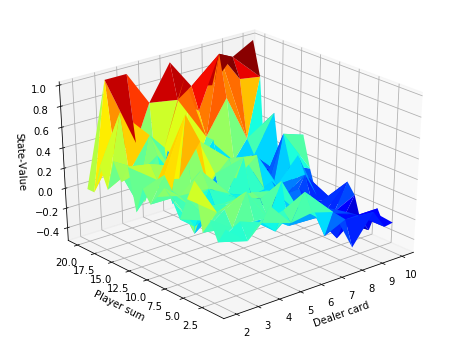

In [49]:
#3d plot of state-value space where no useable Aces are present
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib inline
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d', )

ax.set_xlabel('Dealer card')
ax.set_ylabel('Player sum')
ax.set_zlabel('State-Value')

x,y,z = [],[],[]
for key in stateSpace:
    if (key[0] > 1 and key[1] < 21):
        y.append(key[1])
        x.append(key[0])
        state_value = max([av[(key, 0)], av[(key, 1)]])
        z.append(state_value)
ax.azim = 230
ax.plot_trisurf(x,y,z, linewidth=.02, cmap=cm.jet)

In [30]:
av

{((1, 1), 0): -0.5394808495189661,
 ((1, 1), 1): -0.6253968253968255,
 ((1, 2), 0): -0.5284480455881053,
 ((1, 2), 1): -0.6559999999999998,
 ((1, 3), 0): -0.5280522230063527,
 ((1, 3), 1): -0.5513375513375509,
 ((1, 4), 0): -0.5399627428368672,
 ((1, 4), 1): -0.6385210534146706,
 ((1, 5), 0): -0.5427170868347351,
 ((1, 5), 1): -0.5930232558139539,
 ((1, 6), 0): -0.5331148671955815,
 ((1, 6), 1): -0.5649350649350648,
 ((1, 7), 0): -0.5303043365807399,
 ((1, 7), 1): -0.538461538461539,
 ((1, 8), 0): -0.5508771929824554,
 ((1, 8), 1): -0.40660427290439494,
 ((1, 9), 0): -0.5463258785942491,
 ((1, 9), 1): -0.34698135097489785,
 ((1, 10), 0): -0.5390070921985816,
 ((1, 10), 1): -0.27311311954959194,
 ((1, 11), 0): -0.6125654450261779,
 ((1, 11), 1): -0.20508915260908683,
 ((1, 12), 0): -0.5053763440860217,
 ((1, 12), 1): -0.21601766327860375,
 ((1, 13), 0): -0.5428571428571424,
 ((1, 13), 1): -0.28381866090912605,
 ((1, 14), 0): -0.5189873417721528,
 ((1, 14), 1): -0.2981430310381602,
 ((1,

In [45]:
for i,j in enumerate (av):
    if i%2==0:    
        continue
    print(j[0])
    print(np.argmax(qsv(j[0],av)))
    

(1, 1)
0
(1, 2)
0
(1, 3)
0
(1, 4)
0
(1, 5)
0
(1, 6)
0
(1, 7)
0
(1, 8)
0
(1, 9)
0
(1, 10)
0
(1, 11)
0
(1, 12)
1
(1, 13)
0
(1, 14)
0
(1, 15)
0
(1, 16)
0
(1, 17)
0
(1, 18)
0
(1, 19)
0
(1, 20)
0
(1, 21)
0
(2, 1)
0
(2, 2)
0
(2, 3)
0
(2, 4)
0
(2, 5)
0
(2, 6)
0
(2, 7)
0
(2, 8)
0
(2, 9)
0
(2, 10)
0
(2, 11)
1
(2, 12)
1
(2, 13)
1
(2, 14)
0
(2, 15)
0
(2, 16)
0
(2, 17)
0
(2, 18)
0
(2, 19)
0
(2, 20)
0
(2, 21)
0
(3, 1)
0
(3, 2)
0
(3, 3)
0
(3, 4)
0
(3, 5)
0
(3, 6)
0
(3, 7)
0
(3, 8)
0
(3, 9)
0
(3, 10)
0
(3, 11)
0
(3, 12)
0
(3, 13)
0
(3, 14)
0
(3, 15)
0
(3, 16)
0
(3, 17)
0
(3, 18)
0
(3, 19)
0
(3, 20)
0
(3, 21)
0
(4, 1)
0
(4, 2)
0
(4, 3)
0
(4, 4)
0
(4, 5)
0
(4, 6)
0
(4, 7)
0
(4, 8)
0
(4, 9)
0
(4, 10)
0
(4, 11)
1
(4, 12)
0
(4, 13)
0
(4, 14)
1
(4, 15)
0
(4, 16)
0
(4, 17)
0
(4, 18)
0
(4, 19)
0
(4, 20)
0
(4, 21)
0
(5, 1)
0
(5, 2)
0
(5, 3)
0
(5, 4)
0
(5, 5)
0
(5, 6)
0
(5, 7)
0
(5, 8)
0
(5, 9)
0
(5, 10)
0
(5, 11)
0
(5, 12)
0
(5, 13)
0
(5, 14)
0
(5, 15)
0
(5, 16)
0
(5, 17)
0
(5, 18)
0
(5, 19)
0
(5, 20)
0
(5, 2

In [260]:
z

[]